Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [7]:
#Loading the csv data into pandas dataframe
gold_data=pd.read_csv("gld_price_data.csv")

In [9]:
#first five data items
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
#last five data items
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [12]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [13]:
#basic info of the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [18]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [19]:
#getting the statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1.Positive Correlation (if one attr incrs then other other attr incrs)
2.Negative Correlation (if one attr incrs then other other attr decrs)

In [20]:
correlation=gold_data.corr()

<AxesSubplot:>

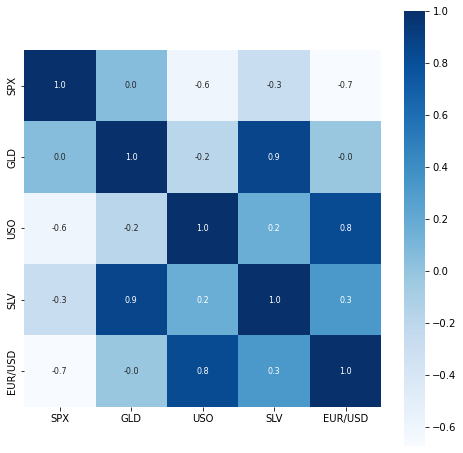

In [22]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [23]:
#correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\PVSMAHESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

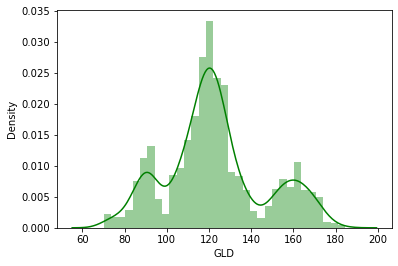

In [25]:
#checking the distribution of GLD price
sns.distplot(gold_data['GLD'],color='green')

Splitting the features(....) and target(GLD)

In [28]:
#x = features y=target
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [29]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [30]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training and testing data

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)

Model Training : Random Forest Regressor

In [33]:
regressor=RandomForestRegressor(n_estimators=100)

In [34]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [35]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)

In [36]:
print(test_data_prediction)

[168.58519946  82.44439989 116.00600033 127.58020077 120.72010104
 154.6847978  149.92369764 126.25089981 117.64469871 125.85180105
 116.75570074 172.72590101 141.08869821 167.9463993  115.29250034
 117.64790038 139.73880341 170.2575011  158.84000297 158.23319921
 155.17050042 125.1777     175.63340021 157.04130286 125.19380031
  93.85549993  77.32990058 120.44960009 119.09099921 167.40749932
  88.20180055 125.22259994  91.17120105 117.7125003  121.13239942
 136.34280004 115.19440119 114.80550072 147.24369956 107.17370122
 104.62570256  87.14229786 126.60190032 118.13670003 153.13309938
 119.76409987 108.5343     108.0765985   93.0939002  126.95169825
  74.83840045 113.59929914 121.41240019 111.23709906 118.76159902
 120.77879939 159.78140078 166.92660138 147.05779691  86.02259857
  94.2271006   86.93089913  90.5176998  119.08390074 126.42570044
 127.5431997  169.5498006  122.35229926 117.30689897  98.30710056
 168.20760181 142.72659858 132.45130243 121.22580247 121.06619932
 119.71340

In [37]:
#R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error : ',error_score)

R squared error :  0.9897592593143476


Compare actual and predicted values in a Plot

In [39]:
Y_test=list(Y_test)

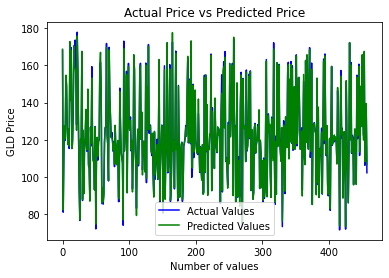

In [40]:
plt.plot(Y_test,color='blue',label='Actual Values')
plt.plot(test_data_prediction,color='green',label='Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()